In [1]:
import stata_setup
import pandas as pd
stata_setup.config("/Applications/STATA","se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user , expiring 31 Aug 2023
Serial number: 401709320927
  Licensed to: Bruno Komel
               University of Pittsburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000; see help set_maxvar.


In [2]:
%%stata

global data  "/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4/Recitation 4 - Handout/Data"
global working  "/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4/Recitation 4 - Handout/Working"


. 
. global data  "/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitati
> ons/Recitation 4/Recitation 4 - Handout/Data"

. global working  "/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recit
> ations/Recitation 4/Recitation 4 - Handout/Working"

. 


In [3]:
%%stata

cd "${data}"


. 
. cd "${data}"
/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4
> /Recitation 4 - Handout/Data

. 


In [4]:
%%stata

set scheme gg_tableau


. 
. set scheme gg_tableau

. 


In [5]:
%%stata

# Import data */
infile SHEET CHAIN CO_OWNED STATE SOUTHJ CENTRALJ NORTHJ PA1 PA2      ///
       SHORE NCALLS EMPFT EMPPT NMGRS WAGE_ST INCTIME FIRSTINC BONUS  ///
       PCTAFF MEALS OPEN HRSOPEN PSODA PFRY PENTREE NREGS NREGS11     ///
       TYPE2 STATUS2 DATE2 NCALLS2 EMPFT2 EMPPT2 NMGRS2 WAGE_ST2      ///
       INCTIME2 FIRSTIN2 SPECIAL2 MEALS2 OPEN2R HRSOPEN2 PSODA2 PFRY2 ///
       PENTREE2 NREGS2 NREGS112 using "public.dat", clear

# Label the state variables and values */
label var STATE "State"
label define state_labels 0 "PA" 1 "NJ"
label values STATE state_labels

# Calculate FTE employement */
gen FTE  = EMPFT  + 0.5 * EMPPT  + NMGRS
label var FTE  "FTE employment before"
gen FTE2 = EMPFT2 + 0.5 * EMPPT2 + NMGRS2
label var FTE2 "FTE employment after"

gen dif = FTE - FTE2


. 
. # Import data */
Unknown #command
. infile SHEET CHAIN CO_OWNED STATE SOUTHJ CENTRALJ NORTHJ PA1 PA2      ///
>        SHORE NCALLS EMPFT EMPPT NMGRS WAGE_ST INCTIME FIRSTINC BONUS  ///
>        PCTAFF MEALS OPEN HRSOPEN PSODA PFRY PENTREE NREGS NREGS11     ///
>        TYPE2 STATUS2 DATE2 NCALLS2 EMPFT2 EMPPT2 NMGRS2 WAGE_ST2      ///
>        INCTIME2 FIRSTIN2 SPECIAL2 MEALS2 OPEN2R HRSOPEN2 PSODA2 PFRY2 ///
>        PENTREE2 NREGS2 NREGS112 using "public.dat", clear
(410 observations read)

. 
. # Label the state variables and values */
Unknown #command
. label var STATE "State"

. label define state_labels 0 "PA" 1 "NJ"

. label values STATE state_labels

. 
. # Calculate FTE employement */
Unknown #command
. gen FTE  = EMPFT  + 0.5 * EMPPT  + NMGRS
(12 missing values generated)

. label var FTE  "FTE employment before"

. gen FTE2 = EMPFT2 + 0.5 * EMPPT2 + NMGRS2
(14 missing values generated)

. label var FTE2 "FTE employment after"

. 
. gen dif = FTE - FTE2
(26 missing val

In [6]:
%%stata

cd "$working"

save working_data, replace


. 
. cd "$working"
/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4
> /Recitation 4 - Handout/Working

. 
. save working_data, replace
file working_data.dta saved

. 


In [7]:
%%stata -doutd df1

use working_data.dta, clear


. 
. use working_data.dta, clear

. 


In [8]:
display(df1)

,SHEET,CHAIN,CO_OWNED,STATE,SOUTHJ,CENTRALJ,NORTHJ,PA1,PA2,SHORE,...,OPEN2R,HRSOPEN2,PSODA2,PFRY2,PENTREE2,NREGS2,NREGS112,FTE,FTE2,dif
0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.5,16.5,1.03,8.988466e+307,0.94,4.0,4.0,40.50,24.00,16.50
1,49.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,13.0,1.01,8.900000e-01,2.35,4.0,4.0,13.75,11.50,2.25
2,506.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,11.0,11.0,0.95,7.400000e-01,2.33,4.0,3.0,8.50,10.50,-2.00
3,56.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,12.0,0.92,7.900000e-01,0.87,2.0,2.0,34.00,20.00,14.00
4,61.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,12.0,1.01,8.400000e-01,0.95,2.0,2.0,24.00,35.50,-11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,423.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,11.0,1.05,8.400000e-01,2.32,3.0,2.0,9.00,23.75,-14.75
406,424.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,14.0,1.05,9.400000e-01,2.32,5.0,3.0,9.75,17.50,-7.75
407,426.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.0,18.0,1.11,1.050000e+00,1.05,6.0,5.0,24.50,20.50,4.00
408,427.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,10.5,12.5,1.11,1.090000e+00,2.07,2.0,2.0,14.00,20.50,-6.50


In [9]:
%%stata

tabstat FTE FTE2, by(STATE) stat(mean semean)


. 
. tabstat FTE FTE2, by(STATE) stat(mean semean)

Summary statistics: Mean, se(mean)
Group variable: STATE (State)

 STATE |       FTE      FTE2
-------+--------------------
    PA |  23.33117  21.16558
       |  1.351149  .9432212
-------+--------------------
    NJ |  20.43941  21.02743
       |  .5082607  .5203094
-------+--------------------
 Total |  20.99887  21.05429
       |  .4887136  .4570134
----------------------------

. 


In [10]:
%%stata

## Editing the data so we can match the paper
expand 2 
## This creates a dublciate of each observation and it appends it to the bottom of the dataset



. 
. ## Editing the data so we can match the paper
Unknown #command
. expand 2 
(410 observations created)

. ## This creates a dublciate of each observation and it appends it to the bott
> om of the dataset
Unknown #command
. 


In [11]:
%%stata

cd "$working"

save working_data, replace


. 
. cd "$working"
/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4
> /Recitation 4 - Handout/Working

. 
. save working_data, replace
file working_data.dta saved

. 


In [12]:
%%stata -doutd df1

use working_data.dta, clear


. 
. use working_data.dta, clear

. 


In [13]:
display(df1)

,SHEET,CHAIN,CO_OWNED,STATE,SOUTHJ,CENTRALJ,NORTHJ,PA1,PA2,SHORE,...,OPEN2R,HRSOPEN2,PSODA2,PFRY2,PENTREE2,NREGS2,NREGS112,FTE,FTE2,dif
0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.5,16.5,1.03,8.988466e+307,0.94,4.0,4.0,40.50,24.00,16.50
1,49.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,13.0,1.01,8.900000e-01,2.35,4.0,4.0,13.75,11.50,2.25
2,506.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,11.0,11.0,0.95,7.400000e-01,2.33,4.0,3.0,8.50,10.50,-2.00
3,56.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,12.0,0.92,7.900000e-01,0.87,2.0,2.0,34.00,20.00,14.00
4,61.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,12.0,1.01,8.400000e-01,0.95,2.0,2.0,24.00,35.50,-11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,11.0,1.05,8.400000e-01,2.32,3.0,2.0,9.00,23.75,-14.75
816,424.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,11.0,14.0,1.05,9.400000e-01,2.32,5.0,3.0,9.75,17.50,-7.75
817,426.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,6.0,18.0,1.11,1.050000e+00,1.05,6.0,5.0,24.50,20.50,4.00
818,427.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,10.5,12.5,1.11,1.090000e+00,2.07,2.0,2.0,14.00,20.50,-6.50


In [14]:
%%stata

gen id = _n 

## Since the data is compiled with one observation per "sheet" or store, 
## I want to separate them between prior and post treatment


. 
. gen id = _n 

. 
. ## Since the data is compiled with one observation per "sheet" or store, 
Unknown #command
. ## I want to separate them between prior and post treatment
Unknown #command
. 


In [15]:
%%stata

gen after = 1 if id > _N/2 
## creating the "after" treatment indicator
replace after = 0 if id <= _N/2



. 
. gen after = 1 if id > _N/2 
(410 missing values generated)

. ## creating the "after" treatment indicator
Unknown #command
. replace after = 0 if id <= _N/2
(410 real changes made)

. 


In [16]:
%%stata

tab STATE, gen(state) 
## this will create indicator variables for each state


. 
. tab STATE, gen(state) 

      State |      Freq.     Percent        Cum.
------------+-----------------------------------
         PA |        158       19.27       19.27
         NJ |        662       80.73      100.00
------------+-----------------------------------
      Total |        820      100.00

. ## this will create indicator variables for each state
Unknown #command
. 


In [17]:
%%stata

rename state2 nj 
## naming one variable after New Jersey


. 
. rename state2 nj 

. ## naming one variable after New Jersey
Unknown #command
. 


In [18]:
%%stata

gen njafter = after*nj 
## creating an interaction term


. 
. gen njafter = after*nj 

. ## creating an interaction term
Unknown #command
. 


In [19]:
%%stata


gen fte = FTE 
#I don't like capital letters and I want this new "fte" variable to disagreggate
#the FTE and FTE2 variables into different observations




. 
. 
. gen fte = FTE 
(24 missing values generated)

. #I don't like capital letters and I want this new "fte" variable to disagregg
> ate
Unknown #command
. #the FTE and FTE2 variables into different observations
Unknown #command
. 
. 


In [20]:
%%stata

replace fte = FTE2 if after ==1 


. 
. replace fte = FTE2 if after ==1 
(392 real changes made, 14 to missing)

. 


In [21]:
%%stata

## Now we can do Diff-in-Diff analyses:

reg fte nj after njafter, robust 
## The traditional specification


. 
. ## Now we can do Diff-in-Diff analyses:
Unknown #command
. 
. reg fte nj after njafter, robust 

Linear regression                               Number of obs     =        794
                                                F(3, 790)         =       1.40
                                                Prob > F          =     0.2404
                                                R-squared         =     0.0074
                                                Root MSE          =     9.4056

------------------------------------------------------------------------------
             |               Robust
         fte | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
          nj |  -2.891761   1.438696    -2.01   0.045     -5.71588    -.067642
       after |  -2.165584   1.641212    -1.32   0.187    -5.387236    1.056067
     njafter |   2.753606   1.795451     1.53   0.126    -.7708128    

In [22]:
%%stata

reg fte njafter nj after, cluster(SHEET) 
## Clustering Standard Errors by store


. 
. reg fte njafter nj after, cluster(SHEET) 

Linear regression                               Number of obs     =        794
                                                F(3, 408)         =       1.81
                                                Prob > F          =     0.1455
                                                R-squared         =     0.0074
                                                Root MSE          =     9.4056

                                (Std. err. adjusted for 409 clusters in SHEET)
------------------------------------------------------------------------------
             |               Robust
         fte | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     njafter |   2.753606   1.306485     2.11   0.036     .1853243    5.321887
          nj |  -2.891761   1.436604    -2.01   0.045    -5.715831   -.0676905
       after |  -2.165584   1.218028    -1.78

In [23]:
%%stata

reg dif nj after nj#after, robust 
## An alternative way to run this regression


. 
. reg dif nj after nj#after, robust 
note: 1.nj#0b.after omitted because of collinearity.
note: 1.nj#1.after omitted because of collinearity.

Linear regression                               Number of obs     =        768
                                                F(3, 764)         =       2.82
                                                Prob > F          =     0.0382
                                                R-squared         =     0.0146
                                                Root MSE          =     8.9678

------------------------------------------------------------------------------
             |               Robust
         dif | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
          nj |      -2.75   1.337725    -2.06   0.040    -5.376054   -.1239464
       after |   1.89e-16    .680668     0.00   1.000    -1.336202    1.336202
             |
    nj#afte

In [24]:
%%stata

reg dif nj after njafter, robust 
##A little cleaner way to do the same thing as above


. 
. reg dif nj after njafter, robust 

Linear regression                               Number of obs     =        768
                                                F(3, 764)         =       2.82
                                                Prob > F          =     0.0382
                                                R-squared         =     0.0146
                                                Root MSE          =     8.9678

------------------------------------------------------------------------------
             |               Robust
         dif | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
          nj |      -2.75   1.337725    -2.06   0.040    -5.376054   -.1239464
       after |          0   1.765137     0.00   1.000    -3.465095    3.465095
     njafter |          0   1.891829     0.00   1.000    -3.713801    3.713801
       _cons |   2.283333    1.24814     1.83   0.068

In [25]:
%%stata

## ssc install diff
diff fte, t(nj) p(after)


. 
. ## ssc install diff
Unknown #command
. diff fte, t(nj) p(after)

DIFFERENCE-IN-DIFFERENCES ESTIMATION RESULTS
--------------------------------------------
Number of observations in the DIFF-IN-DIFF: 794
            Before         After    
   Control: 77             77          154
   Treated: 321            319         640
            398            396
--------------------------------------------------------
 Outcome var.   | fte     | S. Err. |   |t|   |  P>|t|
----------------+---------+---------+---------+---------
Before          |         |         |         | 
   Control      | 23.331  |         |         | 
   Treated      | 20.439  |         |         | 
   Diff (T-C)   | -2.892  | 1.194   | -2.42   | 0.016**
After           |         |         |         | 
   Control      | 21.166  |         |         | 
   Treated      | 21.027  |         |         | 
   Diff (T-C)   | -0.138  | 1.194   | 0.12    | 0.908
                |         |         |         | 
Diff-in-Diff   

In [26]:
%%stata

save working_data, replace


. 
. save working_data, replace
file working_data.dta saved

. 


In [27]:
%%stata

##preserve 

##use working_data
##qui reg fte nj after njafter, robust

##collapse (mean) fte, by(nj after)
##save working_data_did, replace


use working_data_did.dta


. 
. ##preserve 
Unknown #command
. 
. ##use working_data
Unknown #command
. ##qui reg fte nj after njafter, robust
Unknown #command
. 
. ##collapse (mean) fte, by(nj after)
Unknown #command
. ##save working_data_did, replace
Unknown #command
. 
. 
. use working_data_did.dta

. 



. 
. twoway (connected fte after if nj ==1, color(blue)) (connected fte after if n
> j ==0, color(red)), xline(0.5) ///
> legend(label(1 NJ - Treatment) label(2 PA - Control)) 

. save working_data_did, replace
file working_data_did.dta saved

. 


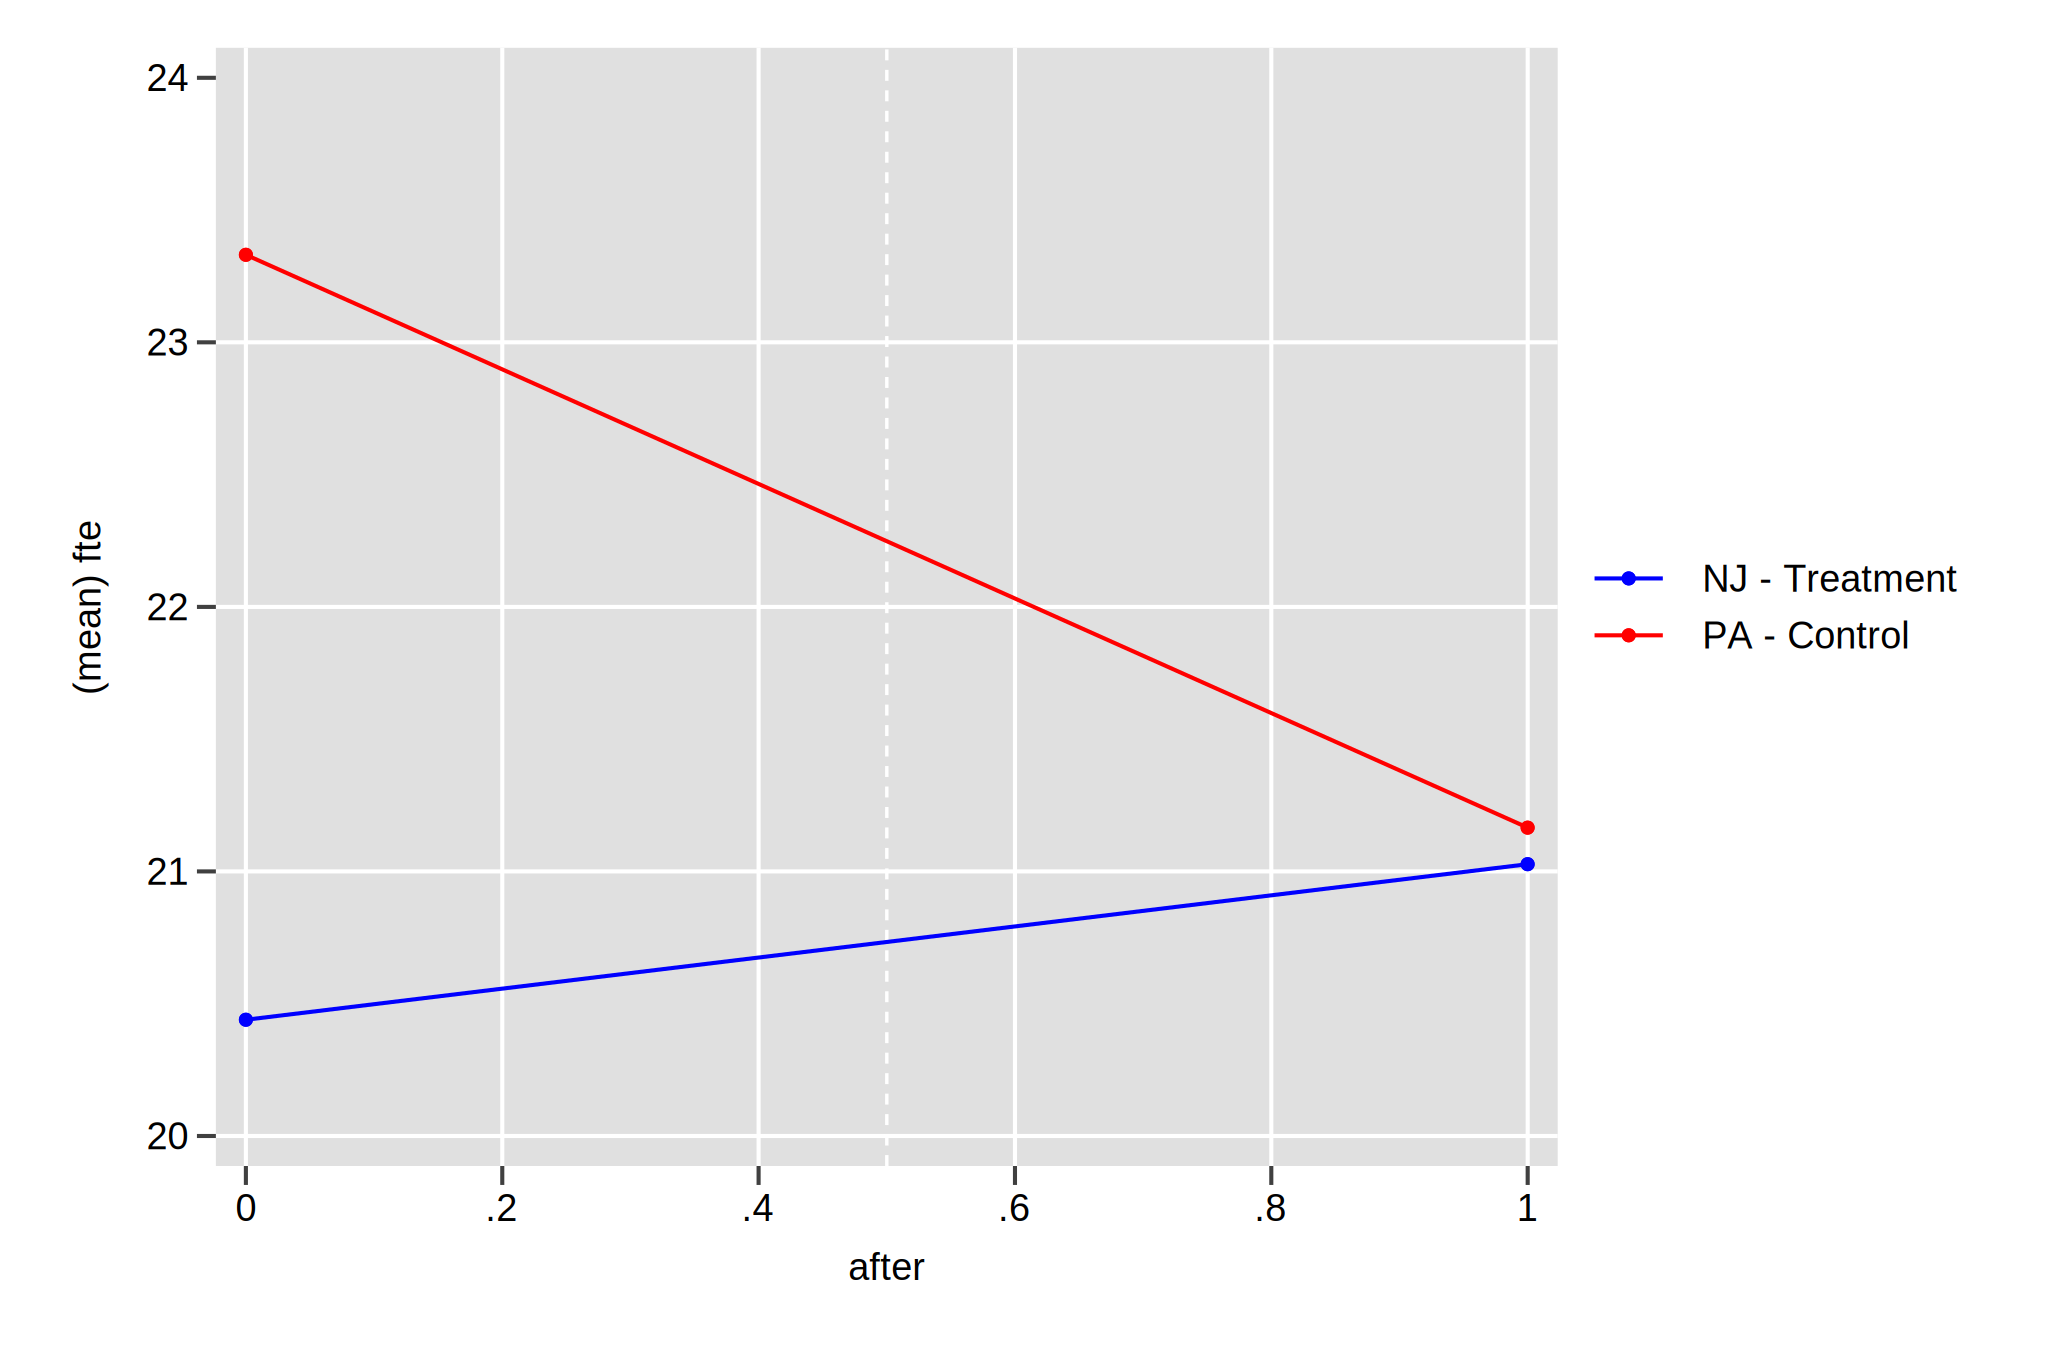

In [28]:
%%stata

twoway (connected fte after if nj ==1, color(blue)) (connected fte after if nj ==0, color(red)), xline(0.5) ///
legend(label(1 NJ - Treatment) label(2 PA - Control)) 
save working_data_did, replace

In [29]:
%%stata
clear
use working_data.dta

quietly reg fte nj after njafter, robust 
##I'm just running this because I want to store one of the coefficients
gen fte_did = fte + _b[nj] 
##Storing the coefficients + the constant so we can observe the 'counterfactual



. clear

. use working_data.dta

. 
. quietly reg fte nj after njafter, robust 

. ##I'm just running this because I want to store one of the coefficients
Unknown #command
. gen fte_did = fte + _b[nj] 
(26 missing values generated)

. ##Storing the coefficients + the constant so we can observe the 'counterfactu
> al
Unknown #command
. 



. clear

. ## preserve
Unknown #command
. 
. ## reg fte nj after njafter, robust
Unknown #command
. 
. ## collapse (mean) fte fte_did, by(nj after)
Unknown #command
. 
. ## save working_data_did2
Unknown #command
. use working_data_did2

. twoway (connected fte after if nj ==1, color(blue)) (connected fte after if n
> j ==0, color(red)) ///
> (connected fte_did after if nj ==0, color(red) lpattern(dash)) , ///
> xline(0.5)   legend(label(1 NJ - Treatment) label(2 PA - Control) label(3 Cou
> nterfactual) ) 

. 
. ##restore
Unknown #command
. 


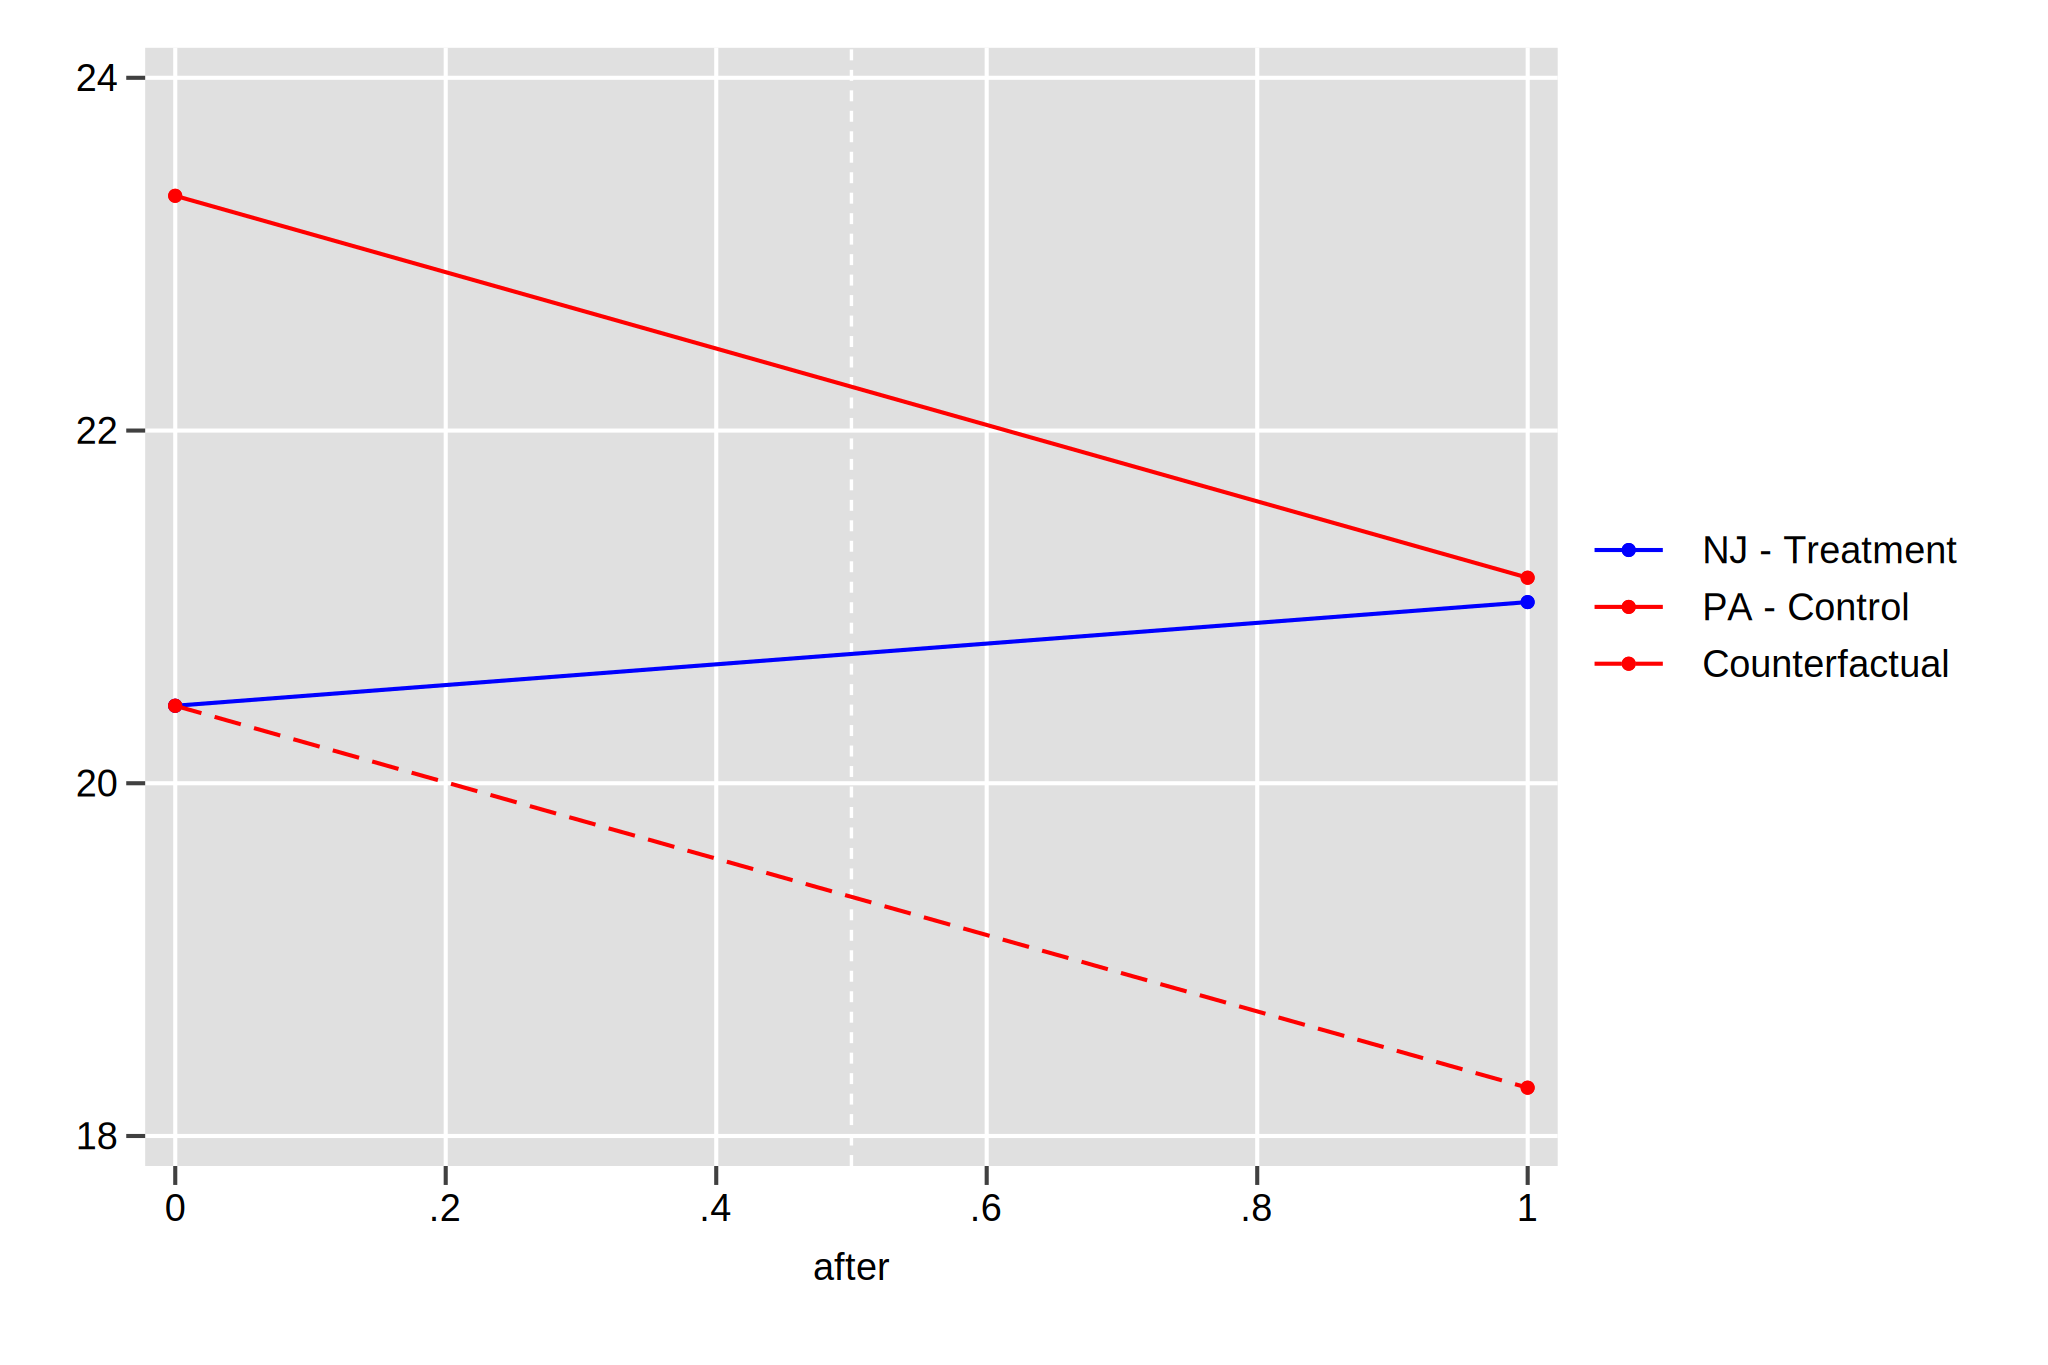

In [30]:
%%stata
clear
## preserve

## reg fte nj after njafter, robust

## collapse (mean) fte fte_did, by(nj after)

## save working_data_did2
use working_data_did2
twoway (connected fte after if nj ==1, color(blue)) (connected fte after if nj ==0, color(red)) ///
(connected fte_did after if nj ==0, color(red) lpattern(dash)) , ///
xline(0.5)   legend(label(1 NJ - Treatment) label(2 PA - Control) label(3 Counterfactual) ) 

##restore


In [32]:
%%stata

/// Difference-in-differences Exercise /// 
cd "$data"
use panel101.dta, clear //reference: slides by Torres-Reyna @ https://www.princeton.edu/~otorres/DID101.pdf



. 
. /// Difference-in-differences Exercise /// 
> cd "$data"
/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4
> /Recitation 4 - Handout/Data

. use panel101.dta, clear //reference: slides by Torres-Reyna @ https://www.pri
> nceton.edu/~otorres/DID101.pdf

. 


In [38]:
%%stata

tab year //from 1990 to 1999
tab country, nolabel //7 countries


. 
. tab year //from 1990 to 1999

       Year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1990 |          7       10.00       10.00
       1991 |          7       10.00       20.00
       1992 |          7       10.00       30.00
       1993 |          7       10.00       40.00
       1994 |          7       10.00       50.00
       1995 |          7       10.00       60.00
       1996 |          7       10.00       70.00
       1997 |          7       10.00       80.00
       1998 |          7       10.00       90.00
       1999 |          7       10.00      100.00
------------+-----------------------------------
      Total |         70      100.00

. tab country, nolabel //7 countries

    Country |      Freq.     Percent        Cum.
------------+-----------------------------------
          1 |         10       14.29       14.29
          2 |         10       14.29       28.57
          3 |         10       14.29       42.86
      

In [34]:
%%stata

gen time = (year>=1994) & !missing(year) 
##generating before and after period, equivalent to a time fixed effect 


. 
. gen time = (year>=1994) & !missing(year) 

. ##generating before and after period, equivalent to a time fixed effect 
Unknown #command
. 


In [35]:
%%stata


gen treated = (country > 4) & !missing(country) 
## generating treatment units and non-treatment units, equivalent to a group fixed effect 



. 
. 
. gen treated = (country > 4) & !missing(country) 

. ## generating treatment units and non-treatment units, equivalent to a group 
> fixed effect 
Unknown #command
. 


In [36]:
%%stata

gen did = time*treated 

## D_it = 1 if country ? 4 and year >= 1994


. 
. gen did = time*treated 

. 
. ## D_it = 1 if country ? 4 and year >= 1994
Unknown #command
. 


In [37]:
%%stata

reg y time treated did



. 
. reg y time treated did

      Source |       SS           df       MS      Number of obs   =        70
-------------+----------------------------------   F(3, 66)        =      1.98
       Model |  5.1898e+19         3  1.7299e+19   Prob > F        =    0.1249
    Residual |  5.7540e+20        66  8.7181e+18   R-squared       =    0.0827
-------------+----------------------------------   Adj R-squared   =    0.0410
       Total |  6.2729e+20        69  9.0912e+18   Root MSE        =    3.0e+09

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        time |   2.29e+09   9.53e+08     2.40   0.019     3.87e+08    4.19e+09
     treated |   1.78e+09   1.13e+09     1.58   0.120    -4.75e+08    4.03e+09
         did |  -2.52e+09   1.46e+09    -1.73   0.088    -5.43e+09    3.87e+08
       _cons |   3.5

In [39]:
%%stata

diff y, t(treated) p(time) 



. 
. diff y, t(treated) p(time) 

DIFFERENCE-IN-DIFFERENCES ESTIMATION RESULTS
--------------------------------------------
Number of observations in the DIFF-IN-DIFF: 70
            Before         After    
   Control: 16             24          40
   Treated: 12             18          30
            28             42
--------------------------------------------------------
 Outcome var.   | y       | S. Err. |   |t|   |  P>|t|
----------------+---------+---------+---------+---------
Before          |         |         |         | 
   Control      |  3.6e+08|         |         | 
   Treated      |  2.1e+09|         |         | 
   Diff (T-C)   |  1.8e+09|  1.1e+09| 1.58    | 0.120
After           |         |         |         | 
   Control      |  2.6e+09|         |         | 
   Treated      |  1.9e+09|         |         | 
   Diff (T-C)   | -7.4e+08|  9.2e+08| 0.81    | 0.422
                |         |         |         | 
Diff-in-Diff    | -2.5e+09|  1.5e+09| 1.73    | 0.088*
--

In [40]:
%%stata

reg y time treated did
gen y_did = y + _b[treated]



. 
. reg y time treated did

      Source |       SS           df       MS      Number of obs   =        70
-------------+----------------------------------   F(3, 66)        =      1.98
       Model |  5.1898e+19         3  1.7299e+19   Prob > F        =    0.1249
    Residual |  5.7540e+20        66  8.7181e+18   R-squared       =    0.0827
-------------+----------------------------------   Adj R-squared   =    0.0410
       Total |  6.2729e+20        69  9.0912e+18   Root MSE        =    3.0e+09

------------------------------------------------------------------------------
           y | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        time |   2.29e+09   9.53e+08     2.40   0.019     3.87e+08    4.19e+09
     treated |   1.78e+09   1.13e+09     1.58   0.120    -4.75e+08    4.03e+09
         did |  -2.52e+09   1.46e+09    -1.73   0.088    -5.43e+09    3.87e+08
       _cons |   3.5


. clear

. cd "$working"
/Users/brunokomel/Documents/Pitt/Year_2/TA - Econ 3080/Recitations/Recitation 4
> /Recitation 4 - Handout/Working

. ## preserve 
Unknown #command
. 
. ## collapse (mean) y y_did, by(treated time)
Unknown #command
. 
. ## save ex_working_did, replace
Unknown #command
. use ex_working_did

. 
. twoway (connected y time if treated ==1, color(blue)) (connected y time if tr
> eated ==0, color(red)) ///
> (connected y_did time if treated ==0, color(red) lpattern(dash))  , ///
> xline(0.5) legend(label(1 Treated) label(2  Control) label(3 Counterfactual))

. 
. ##restore
Unknown #command
. 


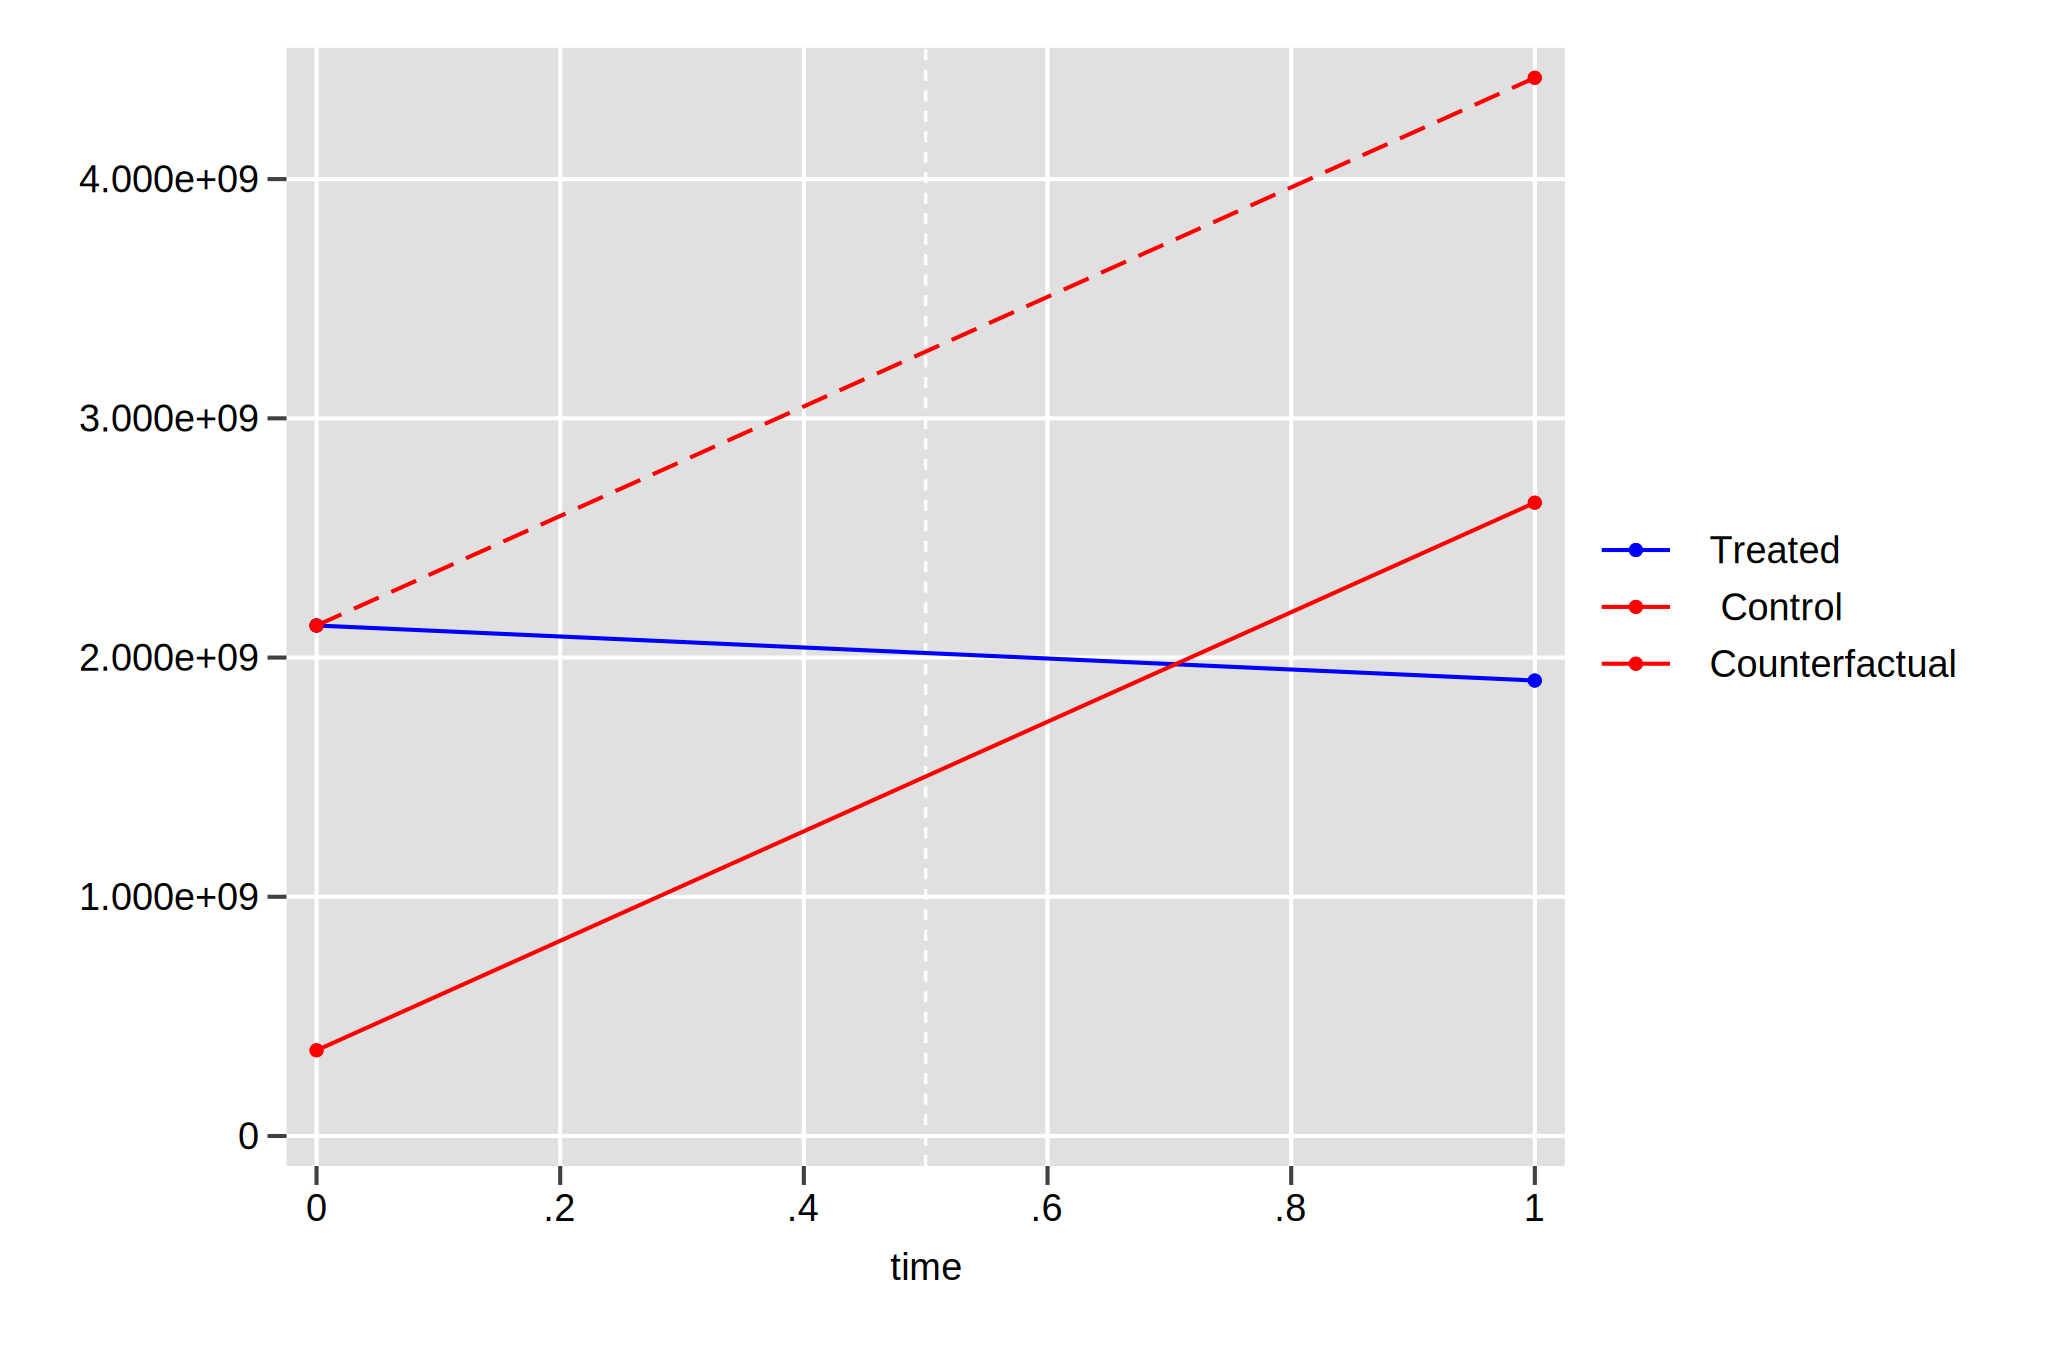

In [41]:
%%stata
clear
cd "$working"
## preserve 

## collapse (mean) y y_did (max) love, by(treated time)

## save ex_working_did, replace
use ex_working_did

twoway (connected y time if treated ==1, color(blue)) (connected y time if treated ==0, color(red)) ///
(connected y_did time if treated ==0, color(red) lpattern(dash))  , ///
xline(0.5) legend(label(1 Treated) label(2  Control) label(3 Counterfactual))

##restore
